# Nagłówek 1-6


**Pogrubiony tekst**
*Tekst kursywą*
~~Przekreślony tekst~~
***pogrubiona kursywa***

> To jest cytat.
>> Cytat zagnieżdżony.

| Kolumna 1 | Kolumna 2 | Kolumna 3 |
|-----------|-----------|-----------|
| Wartość 1 | Wartość 2 | Wartość 3 |
| Wartość 4 | Wartość 5 | Wartość 6 |




# Wstępne przetwarzanie danych


### Wczytanie danych i informacje o nich

In [23]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
data = pd.read_csv('data/HCV-Egy-Data.csv')
    # 1385 rows x 29 columns
    # RBC, PLAT, AL4 - format jako float64
    # reszta jako int64

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1385 non-null   int64  
 1   Gender                           1385 non-null   int64  
 2   BMI                              1385 non-null   int64  
 3   Fever                            1385 non-null   int64  
 4   Nausea/Vomting                   1385 non-null   int64  
 5   Headache                         1385 non-null   int64  
 6   Diarrhea                         1385 non-null   int64  
 7   Fatigue & generalized bone ache  1385 non-null   int64  
 8   Jaundice                         1385 non-null   int64  
 9   Epigastric pain                  1385 non-null   int64  
 10  WBC                              1385 non-null   int64  
 11  RBC                              1385 non-null   float64
 12  HGB                 

### Usuniecie duplikatów
*brak duplikatów*

In [25]:
num_duplicates = data.duplicated().sum()
data = data.drop_duplicates()
print(f'Liczba usuniętych duplikatów: {num_duplicates}')
print(f'Po usunięciu duplikatów: {data.shape}')

Liczba usuniętych duplikatów: 0
Po usunięciu duplikatów: (1385, 29)


### Sprawdzenie brakującyh wartości
*brak brakujacych wartosci*

In [26]:
print(data.isnull().sum())

Age                                0
Gender                             0
BMI                                0
Fever                              0
Nausea/Vomting                     0
Headache                           0
Diarrhea                           0
Fatigue & generalized bone ache    0
Jaundice                           0
Epigastric pain                    0
WBC                                0
RBC                                0
HGB                                0
Plat                               0
AST 1                              0
ALT 1                              0
ALT4                               0
ALT 12                             0
ALT 24                             0
ALT 36                             0
ALT 48                             0
ALT after 24 w                     0
RNA Base                           0
RNA 4                              0
RNA 12                             0
RNA EOT                            0
RNA EF                             0
B

### Obsługa outlinerow

#### Sprawdzenie czy dane są poprawnie odczytywane
##### *( ! ) nelzelao usunac biale znaki znazwykolumn*

In [54]:
continuous_features = ['Age', 'BMI', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']

In [55]:
# Sprawdzenie, które kolumny istnieją w zbiorze danych
existing_features = [feature for feature in continuous_features if feature in data.columns]
missing_features = [feature for feature in continuous_features if feature not in data.columns]

In [56]:
if missing_features:
    print(f"Ostrzeżenie: Następujące kolumny nie zostały znalezione w zbiorze danych i zostaną pominięte: {missing_features}")

#### Identyfiakcja outlinerów za pomocą wykresów pudełkowych
*brak outlinerow w kilku ciaglych a w rescie usuniecie w dwóch kolumnach*

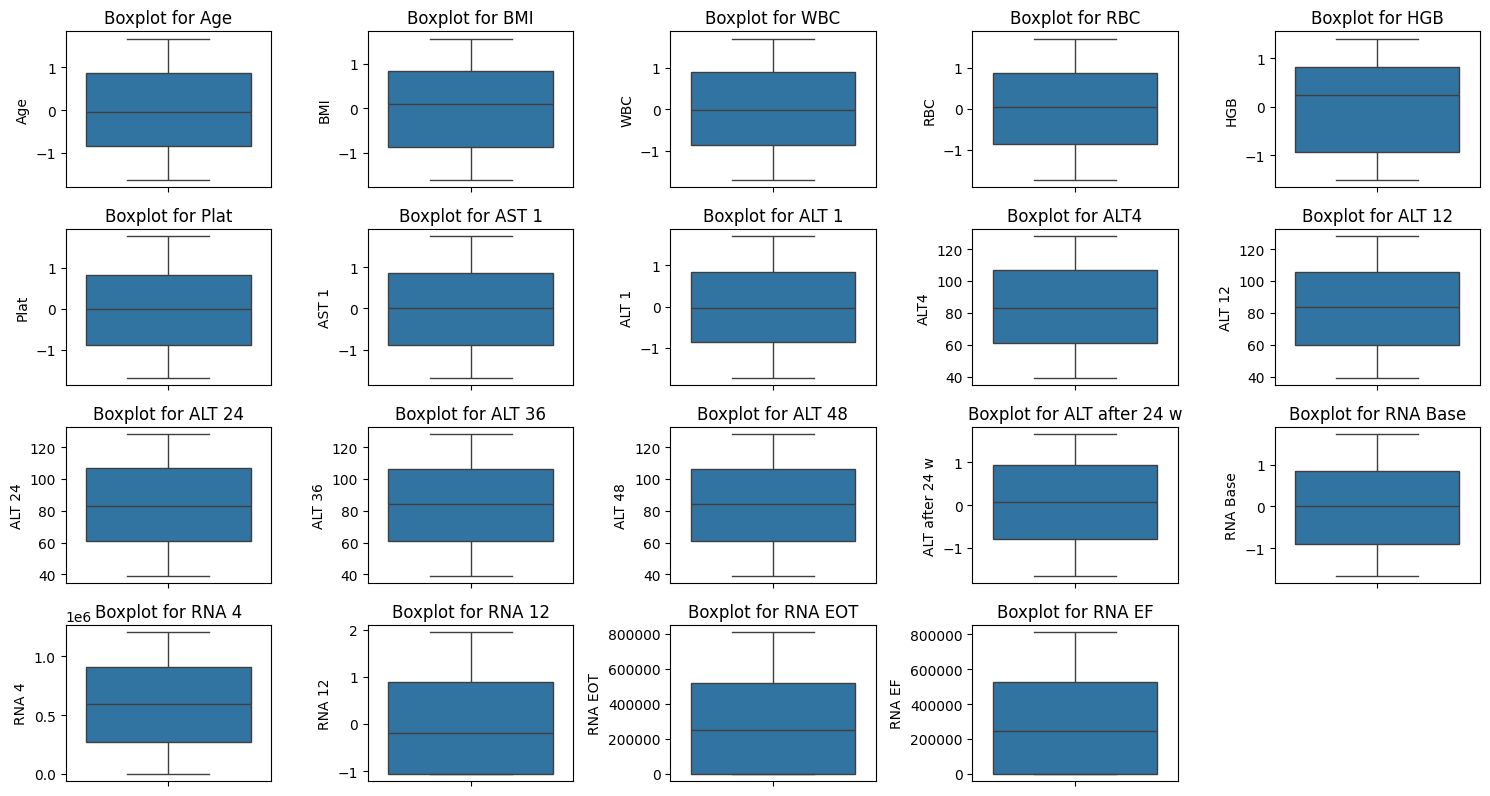

In [58]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(data[feature])
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()

In [59]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 1381 entries, 1 to 1384
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1381 non-null   float64
 1   Gender                           1381 non-null   int64  
 2   BMI                              1381 non-null   float64
 3   Fever                            1381 non-null   int64  
 4   Nausea/Vomting                   1381 non-null   int64  
 5   Headache                         1381 non-null   int64  
 6   Diarrhea                         1381 non-null   int64  
 7   Fatigue & generalized bone ache  1381 non-null   int64  
 8   Jaundice                         1381 non-null   int64  
 9   Epigastric pain                  1381 non-null   int64  
 10  WBC                              1381 non-null   float64
 11  RBC                              1381 non-null   float64
 12  HGB                      

##### Identyfikacja outlinerów dla pozostałych cech ciągłych

Sprawdzanie outlierów dla pozostałych cech ciągłych: ['ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']


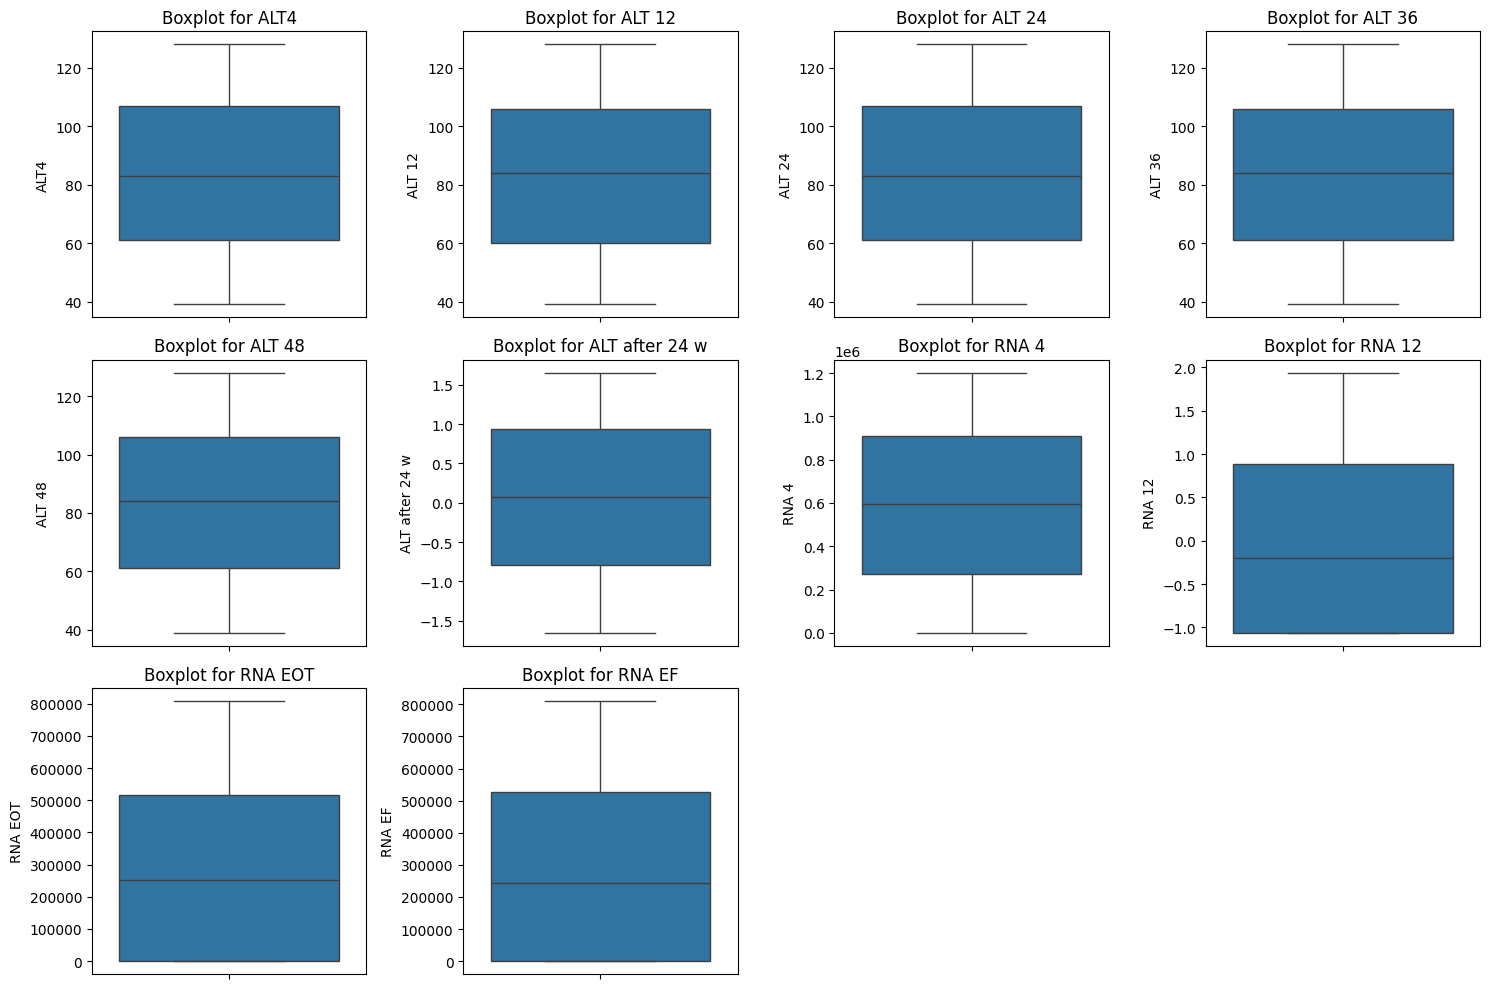

In [60]:
remaining_features = ['ALT4','ALT 12','ALT 24','ALT 36','ALT 48','ALT after 24 w','RNA 4','RNA 12','RNA EOT','RNA EF']

if remaining_features:
    print(f"Sprawdzanie outlierów dla pozostałych cech ciągłych: {remaining_features}")
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(remaining_features, 1):
        plt.subplot(3, 4, i)
        sns.boxplot(data[feature])
        plt.title(f'Boxplot for {feature}')
    plt.tight_layout()
    plt.show()

##### Usuwanie outlierów za pomocą metody IQR (Interquartile Range) dla 'ALT 24 after w' oraz 'RNA 12'
###### 4 wiersze suunieta

In [61]:
features_to_remove_outliers = ['ALT after 24 w', 'RNA 12']
for feature in features_to_remove_outliers:
    if feature in data.columns:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filtrowanie danych, usuwanie outlierów
        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

print(f'Po usunięciu outlierów: {data.shape}')


Po usunięciu outlierów: (1381, 29)


Sprawdzanie czy outlierów zostały usunięte: ['ALT after 24 w', 'RNA 12']


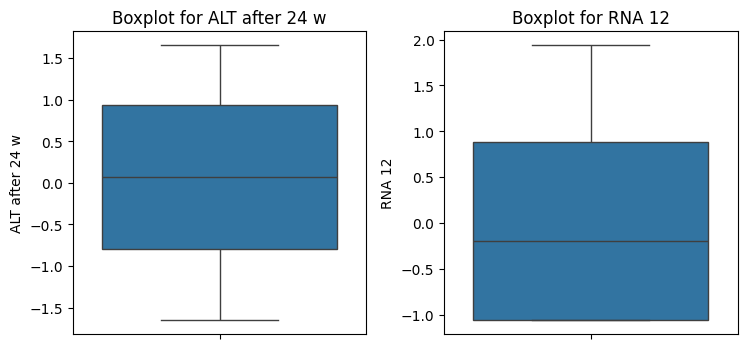

In [62]:
if features_to_remove_outliers:
    print(f"Sprawdzanie czy outlierów zostały usunięte: {features_to_remove_outliers}")
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features_to_remove_outliers, 1):
        plt.subplot(3, 4, i)
        sns.boxplot(data[feature])
        plt.title(f'Boxplot for {feature}')
    plt.tight_layout()
    plt.show()

### Standaryzacja

In [63]:
from sklearn.preprocessing import StandardScaler

In [65]:
# Przed standaryzacją - podgląd danych
print("Dane przed standaryzacją:")
print(data[continuous_features].describe())

Dane przed standaryzacją:
                Age           BMI           WBC           RBC           HGB  \
count  1.381000e+03  1.381000e+03  1.381000e+03  1.381000e+03  1.381000e+03   
mean  -2.723704e-16  3.936026e-16  9.003981e-17 -1.330017e-15 -3.820261e-16   
std    1.000362e+00  1.000362e+00  1.000362e+00  1.000362e+00  1.000362e+00   
min   -1.631389e+00 -1.619604e+00 -1.704863e+00 -1.748787e+00 -1.512119e+00   
25%   -8.330777e-01 -8.828062e-01 -8.692639e-01 -8.685528e-01 -9.283236e-01   
50%   -3.476663e-02  9.959135e-02 -9.297531e-03  4.671999e-02  2.392674e-01   
75%    8.775889e-01  8.363895e-01  9.005274e-01  8.720245e-01  8.230628e-01   
max    1.675900e+00  1.573188e+00  1.710260e+00  1.720831e+00  1.406858e+00   

               Plat         AST 1         ALT 1         ALT4       ALT 12  \
count  1.381000e+03  1.381000e+03  1.381000e+03  1381.000000  1381.000000   
mean  -1.106203e-16  1.389186e-16  2.366761e-16    83.435916    83.496741   
std    1.000362e+00  1.000362e+

In [66]:
# Standaryzacja zmiennych ciągłych
scaler = StandardScaler()
data[features_to_remove_outliers] = scaler.fit_transform(data[features_to_remove_outliers])

In [67]:
# Po standaryzacji - podgląd danych
print("Dane po standaryzacji:")
print(data[existing_features].describe())

Dane po standaryzacji:
                Age           BMI           WBC           RBC           HGB  \
count  1.381000e+03  1.381000e+03  1.381000e+03  1.381000e+03  1.381000e+03   
mean  -2.723704e-16  3.936026e-16  9.003981e-17 -1.330017e-15 -3.820261e-16   
std    1.000362e+00  1.000362e+00  1.000362e+00  1.000362e+00  1.000362e+00   
min   -1.631389e+00 -1.619604e+00 -1.704863e+00 -1.748787e+00 -1.512119e+00   
25%   -8.330777e-01 -8.828062e-01 -8.692639e-01 -8.685528e-01 -9.283236e-01   
50%   -3.476663e-02  9.959135e-02 -9.297531e-03  4.671999e-02  2.392674e-01   
75%    8.775889e-01  8.363895e-01  9.005274e-01  8.720245e-01  8.230628e-01   
max    1.675900e+00  1.573188e+00  1.710260e+00  1.720831e+00  1.406858e+00   

               Plat         AST 1         ALT 1         ALT4       ALT 12  \
count  1.381000e+03  1.381000e+03  1.381000e+03  1381.000000  1381.000000   
mean  -1.106203e-16  1.389186e-16  2.366761e-16    83.435916    83.496741   
std    1.000362e+00  1.000362e+00 

In [ ]:
for feature in existing_features:
    print(f"{feature} > Mean: {data[feature].mean()}, Std: {data[feature].std()}")
    
# TODO: STANDARYZACJA POZOSTALYCH CECH CIAGLYCH


Age > Mean: -2.723704277646655e-16, Std: 1.0003622532268794
BMI > Mean: 3.93602601633944e-16, Std: 1.0003622532268797
WBC > Mean: 9.003981083129438e-17, Std: 1.0003622532268794
RBC > Mean: -1.3300166342794054e-15, Std: 1.0003622532268794
HGB > Mean: -3.820260545270633e-16, Std: 1.0003622532268794
Plat > Mean: -1.1062033902130452e-16, Std: 1.0003622532268794
AST 1 > Mean: 1.3891856528256846e-16, Std: 1.0003622532268794
ALT 1 > Mean: 2.3667607418511664e-16, Std: 1.0003622532268794
ALT4 > Mean: 83.43591600289645, Std: 26.548773526712104
ALT 12 > Mean: 83.49674149167271, Std: 26.067599347681423
ALT 24 > Mean: 83.65242577842143, Std: 26.209097385793385
ALT 36 > Mean: 83.27950760318609, Std: 26.18302511924569
ALT 48 > Mean: 83.79580014482259, Std: 26.003684460799793
ALT after 24 w > Mean: -2.5725660237512677e-18, Std: 1.0003622532268797
RNA Base > Mean: -9.775750890254817e-17, Std: 1.0003622532268794
RNA 4 > Mean: 600412.6625633598, Std: 362626.7051926843
RNA 12 > Mean: 2.572566023751268e-17

### Podsumowanie i zapis oczyszczonych danych

In [ ]:
# Podsumowanie po czyszczeniu danych
# print(data.info())
# print(data.describe())

# Zapisz oczyszczony zbior danych do nowego pliku
# data.to_csv('cleaned_database.csv', index=False)
